In [273]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [274]:
#read in dataframes

train = pd.read_csv('train.csv')
test = pd.read_csv('sample_submission_zero.csv')
members = pd.read_csv('members.csv')

#txns = pd.read_csv('transactions.csv')
#logs = pd.read_csv('user_logs.csv')

In [275]:
train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [276]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992931 entries, 0 to 992930
Data columns (total 2 columns):
msno        992931 non-null object
is_churn    992931 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.2+ MB


In [277]:
test.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,0


In [278]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null object
is_churn    970960 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


In [279]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,URiXrfYPzHAlk+7+n7BOMl9G+T7g8JmrSnT/BU8GmEo=,1,0,NaN,9,20150525,20150526
1,U1q0qCqK/lDMTD2kN8G9OXMtfuvLCey20OAIPOvXXGQ=,1,0,NaN,4,20161221,20161224
2,W6M2H2kAoN9ahfDYKo3J6tmsJRAeuFc9wl1cau5VL1Q=,1,0,NaN,4,20160306,20160309
3,1qE5+cN7CUyC+KFH6gBZzMWmM1QpIVW6A43BEm98I/w=,5,17,female,4,20161031,20161107
4,SeAnaZPI+tFdAt+r3lZt/B8PgTp7bcG/1os39u4pLxs=,1,0,NaN,4,20170202,20170205


In [280]:
#explore members dataset

print(members['msno'].nunique())

5116194


In [281]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116194 entries, 0 to 5116193
Data columns (total 7 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
expiration_date           int64
dtypes: int64(5), object(2)
memory usage: 273.2+ MB


In [282]:
#merge train and test with members data

train = train.merge(members, on = 'msno', how = 'left')
test = test.merge(members, on = 'msno', how = 'left')
train.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,expiration_date
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0,20170907.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0,20170321.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0,20170203.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0,20170926.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0,20170927.0


In [283]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 8 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int64
city                      876143 non-null float64
bd                        876143 non-null float64
gender                    396057 non-null object
registered_via            876143 non-null float64
registration_init_time    876143 non-null float64
expiration_date           876143 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 68.2+ MB


In [284]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 8 columns):
msno                      970960 non-null object
is_churn                  970960 non-null int64
city                      859688 non-null float64
bd                        859688 non-null float64
gender                    393333 non-null object
registered_via            859688 non-null float64
registration_init_time    859688 non-null float64
expiration_date           859688 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 66.7+ MB


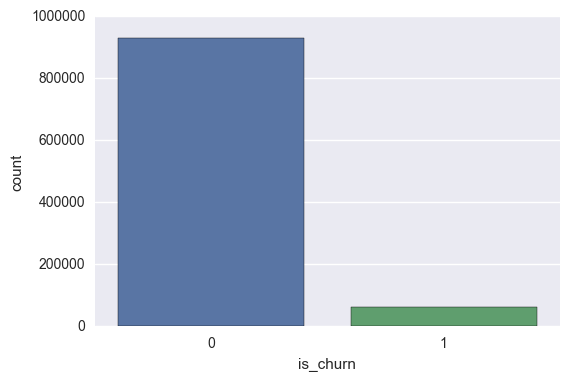

In [285]:
sns.countplot(x = 'is_churn', data = train)

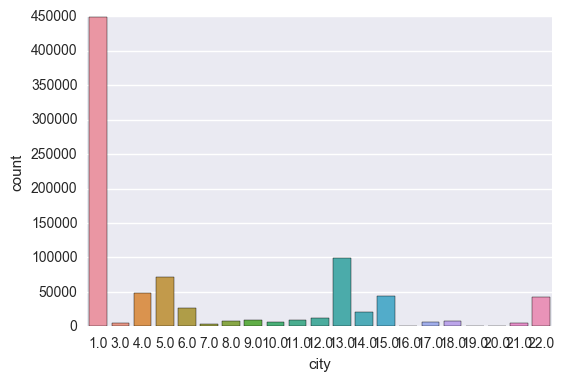

In [286]:
sns.countplot(x = 'city', data = train)

In [287]:
train['city'] = train['city'].fillna(1)
test['city'] = test['city'].fillna(1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 8 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int64
city                      992931 non-null float64
bd                        876143 non-null float64
gender                    396057 non-null object
registered_via            876143 non-null float64
registration_init_time    876143 non-null float64
expiration_date           876143 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 68.2+ MB


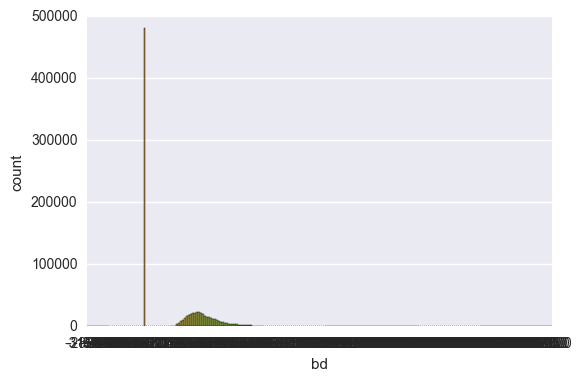

In [288]:
sns.countplot(x = 'bd', data = train)

In [289]:
#look into min, max, and median values

print(train['bd'].min())
print(train['bd'].max())
print(train['bd']).mean()

-3152.0
2015.0
13.5599553954


In [290]:
train.bd[train['bd'] >= 100] = 'NaN' #train.bd[(train['bd'] > 0) & (train['bd'] < 100)].median()
train.bd[train['bd'] <= 0] = 'NaN' #train.bd[(train['bd'] > 0) & (train['bd'] < 100)].median()

test.bd[test['bd'] >= 100] = 'NaN' #train.bd[(train['bd'] > 0) & (train['bd'] < 100)].median()
test.bd[test['bd'] <= 0] = 'NaN' #train.bd[(train['bd'] > 0) & (train['bd'] < 100)].median()

C:\Python2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Python2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [291]:
print(train['bd'].min())
print(train['bd'].max())
print(train['bd']).median()

1.0
NaN
28.0


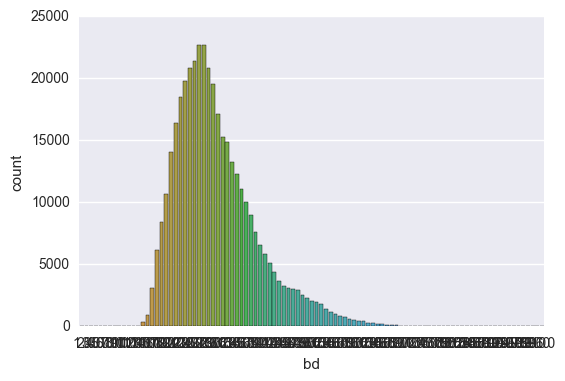

In [292]:
sns.countplot(x = 'bd', data = train[train['bd'] != 'NaN'])

In [293]:
train['bd'].value_counts().head()

NaN     481708
26.0     22678
27.0     22663
25.0     21379
24.0     20817
Name: bd, dtype: int64

In [294]:
#clean up bd values

train['bd'].fillna(train.bd[(train['bd'] > 0) & (train['bd'] < 100)].median(), inplace = True)
train.bd[train['bd'] == 'NaN'] = 28

test['bd'].fillna(test.bd[(test['bd'] > 0) & (test['bd'] < 100)].median(), inplace = True)
test.bd[test['bd'] == 'NaN'] = 28

print(train['bd'].min())
print(train['bd'].max())
print(train['bd']).median()

C:\Python2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.0
99.0
28.0


In [295]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 8 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int64
city                      992931 non-null float64
bd                        992931 non-null object
gender                    396057 non-null object
registered_via            876143 non-null float64
registration_init_time    876143 non-null float64
expiration_date           876143 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 68.2+ MB


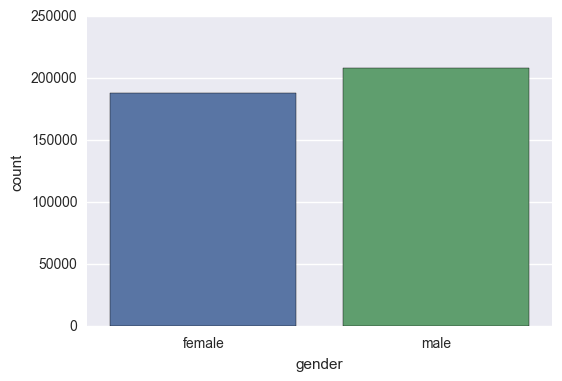

In [296]:
sns.countplot(x = 'gender', data = train)

In [297]:
train['gender'].fillna(0, inplace = True)
train['gender'].replace('female', 1, inplace = True)
train['gender'].replace('male', 2, inplace = True)

test['gender'].fillna(0, inplace = True)
test['gender'].replace('female', 1, inplace = True)
test['gender'].replace('male', 2, inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 8 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int64
city                      992931 non-null float64
bd                        992931 non-null object
gender                    992931 non-null int64
registered_via            876143 non-null float64
registration_init_time    876143 non-null float64
expiration_date           876143 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 68.2+ MB


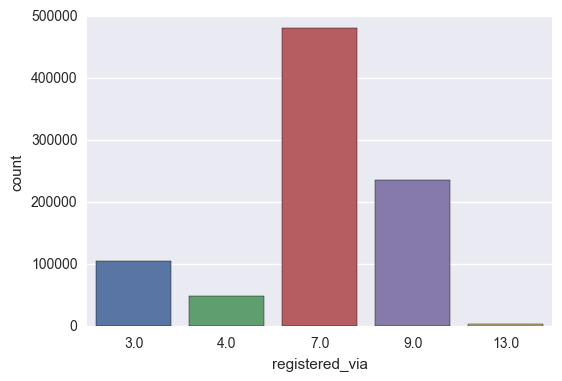

In [298]:
sns.countplot(x = 'registered_via', data = train)

In [299]:
train['registered_via'].fillna(7.0, inplace = True)
test['registered_via'].fillna(7.0, inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 8 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int64
city                      992931 non-null float64
bd                        992931 non-null object
gender                    992931 non-null int64
registered_via            992931 non-null float64
registration_init_time    876143 non-null float64
expiration_date           876143 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 68.2+ MB


In [300]:
train['registration_init_time'].value_counts().head(1)

20151009.0    1577
Name: registration_init_time, dtype: int64

In [301]:
train['registration_init_time'].fillna(20151009.0, inplace = True)
test['registration_init_time'].fillna(20151009.0, inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 8 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int64
city                      992931 non-null float64
bd                        992931 non-null object
gender                    992931 non-null int64
registered_via            992931 non-null float64
registration_init_time    992931 non-null float64
expiration_date           876143 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 68.2+ MB


In [302]:
train['expiration_date'].value_counts().head(1)

20170930.0    130331
Name: expiration_date, dtype: int64

In [303]:
train['expiration_date'].fillna(20170930.0, inplace = True)
test['expiration_date'].fillna(20170930.0, inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 8 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int64
city                      992931 non-null float64
bd                        992931 non-null object
gender                    992931 non-null int64
registered_via            992931 non-null float64
registration_init_time    992931 non-null float64
expiration_date           992931 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 68.2+ MB


In [304]:
#train test split

msno = test['msno']
msno = pd.DataFrame(msno, columns = ['msno'])

del train['msno']
del test['msno']
X, y = train.drop('is_churn', axis = 1), train['is_churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [305]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.93581433572490358

In [306]:
del test['is_churn']
test.head()

,city,bd,gender,registered_via,registration_init_time,expiration_date
0,5.0,28,2,3.0,20131223.0,20170822.0
1,13.0,20,2,3.0,20131223.0,20170519.0
2,13.0,18,2,3.0,20131227.0,20170919.0
3,1.0,28,0,7.0,20140109.0,20160325.0
4,13.0,35,1,7.0,20140125.0,20180218.0


In [315]:
result = logreg.predict_proba(test)
result = pd.DataFrame(result, columns = ['delete', 'is_churn'])
del result['delete']
result = pd.concat([msno, pd.DataFrame(result)], axis = 1, join_axes = [msno.index])
result.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,0.063161
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,0.063214
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,0.063145
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,0.066558
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,0.063008


In [317]:
result.to_csv('submission.csv', sep = ',', index = False)